# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from scipy.io import arff

from algo_implementation import logistic_regression
from preprocessor import Preprocessor

# library & dataset
import seaborn as sns
import matplotlib.pyplot as plt


# Dataset 1 preparation

## Preprocessing

In [3]:
def decode_bytes(x):
    """
    Function for decoding bytes-type data 
    """
    if isinstance(x, bytes):
        return x.decode()
    else:
        return x

In [18]:
preprocessor = Preprocessor()
preprocessor.remove_spaces('chronic_kidney_disease.arff', 'chronic_kidney_disease2.arff')

data, meta = arff.loadarff('chronic_kidney_disease2.arff')
dataset1 = pd.DataFrame(data)
dataset1 = dataset1.applymap(decode_bytes)
dataset1 = dataset1.replace('?', np.nan)

categorical_cols, numerical_cols = preprocessor.get_cat_num_colnames(dataset1)



In [5]:
processed_data = preprocessor.data_preprocess(dataset1, categorical_cols, numerical_cols)
X, y = processed_data.iloc[:, :-1], processed_data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.2)

## Colinearity detection

### VIF

In [14]:
p = Preprocessor()
vif_coefs = p.vif(X_train.drop('su_0', axis=1))
vif_coefs[vif_coefs['VIF'] >= 7]

c:\Users\mikol\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
c:\Users\mikol\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,variables,VIF
16,su_nan,15.7396
17,al_0,inf
18,al_1,inf
19,al_2,inf
20,al_3,inf
21,al_4,inf
23,al_nan,inf
24,sg_1.005,inf
25,sg_1.010,inf
26,sg_1.015,inf


### Correlation

In [7]:
corr_matrix = X_train.corr()
corr_matrix



,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,...,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
age,1.000000,0.152199,0.236323,0.195399,0.140063,-0.069579,0.043421,-0.184362,-0.187031,0.096293,...,-0.037435,-0.132410,0.169893,0.060294,0.395772,0.407300,0.237916,0.143978,0.108481,0.045511
bp,0.152199,1.000000,0.206005,0.146520,0.111594,-0.105270,0.071787,-0.263191,-0.302335,0.010160,...,-0.119272,-0.140634,0.064362,0.060926,0.275136,0.233867,0.065825,0.167141,0.028995,0.164663
bgr,0.236323,0.206005,1.000000,0.140690,0.102463,-0.148187,0.071314,-0.291373,-0.280311,0.100490,...,-0.189727,-0.277872,0.197297,0.054702,0.364005,0.505440,0.230908,0.229730,0.091880,0.141118
bu,0.195399,0.146520,0.140690,1.000000,0.573234,-0.284353,0.371213,-0.517756,-0.498231,0.067299,...,-0.158330,-0.345455,0.202964,0.124102,0.335019,0.303527,0.174674,0.257183,0.319522,0.400471
sc,0.140063,0.111594,0.102463,0.573234,1.000000,-0.641833,0.219745,-0.313843,-0.314718,-0.014338,...,-0.085235,-0.148174,0.051734,0.040131,0.263962,0.198009,0.203710,0.156525,0.161721,0.198469
sod,-0.069579,-0.105270,-0.148187,-0.284353,-0.641833,1.000000,0.075369,0.321203,0.329839,0.015646,...,0.111963,0.155426,-0.131046,-0.063453,-0.298546,-0.283913,-0.231388,-0.153113,-0.149995,-0.182446
pot,0.043421,0.071787,0.071314,0.371213,0.219745,0.075369,1.000000,-0.103645,-0.129761,-0.085081,...,0.020492,-0.168392,-0.026567,-0.004777,0.061357,0.063677,-0.009521,-0.026297,0.062154,0.112296
hemo,-0.184362,-0.263191,-0.291373,-0.517756,-0.313843,0.321203,-0.103645,1.000000,0.853551,-0.139558,...,0.263103,0.418010,-0.265093,-0.182825,-0.554404,-0.476939,-0.259377,-0.382935,-0.369874,-0.545979
pcv,-0.187031,-0.302335,-0.280311,-0.498231,-0.314718,0.329839,-0.129761,0.853551,1.000000,-0.174392,...,0.265172,0.444125,-0.283935,-0.158721,-0.542449,-0.476929,-0.261583,-0.382634,-0.395165,-0.497155
wbcc,0.096293,0.010160,0.100490,0.067299,-0.014338,0.015646,-0.085081,-0.139558,-0.174392,1.000000,...,-0.010013,-0.130245,0.178629,0.124502,0.097674,0.130672,-0.020628,0.141528,0.126905,0.043194


## Feature selection

### Chi2 selector

In [8]:
selector = SelectKBest(chi2, k=10)
X_chi2_train= selector.fit_transform(X_train, y_train)
X_chi2_test = selector.transform(X_test)

### PCA

In [9]:

pca = PCA(n_components=10)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)
print(pca.explained_variance_)
print(X_pca_train[:10, :])

[0.96874205 0.43055454 0.24752179 0.2029795  0.17968111 0.16080584
 0.14222498 0.12611737 0.12339236 0.11393265]
[[-1.04865965e+00  8.62620750e-02  6.41237540e-01 -7.17348888e-02
   2.56536518e-02  3.97770065e-02  3.31227419e-02  2.35597485e-03
  -4.79370976e-02 -7.11930065e-02]
 [-6.12027074e-01 -1.80084277e-01 -2.25618813e-01 -5.95629881e-01
   3.08078694e-01 -2.18487656e-01 -1.16268345e-01  4.92871440e-01
  -3.79639104e-01 -2.76446002e-01]
 [ 8.13457028e-02 -5.07508658e-01  4.56847116e-02  4.92307177e-01
   2.93181687e-01 -9.81656871e-02 -7.62794217e-01 -5.18470055e-01
  -1.09571147e-01 -7.13906659e-01]
 [ 1.67598660e+00  1.35486998e+00  3.10384491e-02  2.87033596e-01
   3.52328262e-01  2.64225677e-01  6.79366696e-02  4.15995260e-01
   3.37079708e-01 -5.66564225e-01]
 [-1.04789720e+00  9.58249912e-02  6.42633899e-01 -8.38794476e-02
  -1.43057914e-03  4.33850321e-02  4.38726765e-02 -1.77709405e-02
  -3.75750649e-02 -4.83633974e-02]
 [ 7.42729115e-01 -8.74983429e-01 -1.78046733e-01 -4

## Fit IRLS model

In [10]:
model = logistic_regression()
model.fit(X_pca_train, y_train)
print('beta:', model.beta)
accuracy = model.accuracy(X_pca_test, y_test)
print('pca_accuracy: {:.2f}'.format(accuracy))

(320, 11)
(11,)
beta: [-1815.51787864 -2176.16667982  1431.155768    -139.37925278
  1920.60804538 -1741.82916653   -64.53738568  -369.98421262
 -3057.4475678    621.25845849   558.2443201 ]
pca_accuracy: 0.95


c:\Users\mikol\OneDrive\Desktop\Deep_Learning\algo_implementation.py:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [12]:
model = logistic_regression()
model.fit(X_train.values, y_train.values)
print('Beta is equal:',model.beta)
accuracy = model.accuracy(X_test, y_test)
print('pca_accuracy: {:.2f}'.format(accuracy))

(320, 42)
(42,)
Beta is equl: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
pca_accuracy: 0.65


## Export dataset to $.csv$

In [ ]:
kidney_disease = pd.concat([X, pd.DataFrame(y, columns=["class"])], axis=1)
kidney_disease.to_csv('kidney_disease.csv', index=False)

# Dataset 2 preparation

## Preprocessing

In [5]:
# read data from csv file
data2 = pd.read_csv('Tetuan_city_power_cons.csv')

In [6]:
data2 = data2[:10000]

In [7]:
# set index to datetime with localized timezone
data2 = data2.set_index('DateTime')
data2.index = pd.to_datetime(data2.index).tz_localize('UTC')

In [8]:
data2.columns = data2.columns.str.replace(' ', '_')

In [9]:
# no data leaks
data2.isna().sum()

Temperature                  0
Humidity                     0
Wind_Speed                   0
general_diffuse_flows        0
diffuse_flows                0
Zone_1_Power_Consumption     0
Zone_2__Power_Consumption    0
Zone_3__Power_Consumption    0
dtype: int64

Text(0.5, 1.0, 'Geometric interpretation of standard consumption')

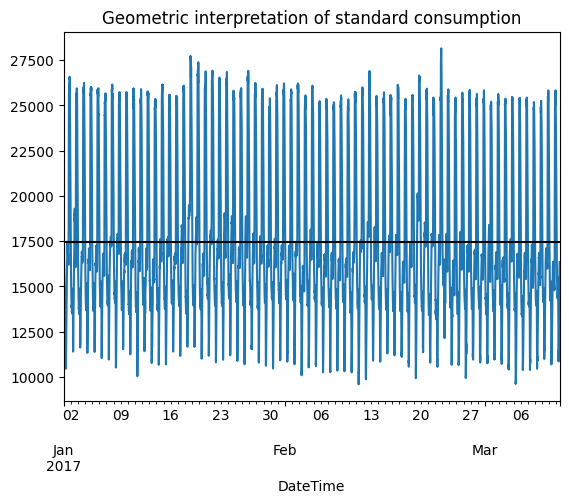

In [10]:
data2['Zone_3__Power_Consumption'].plot()
calculated_mean = data2['Zone_3__Power_Consumption'].mean()
plt.axhline(y=calculated_mean, color='black', linestyle='-')
plt.title('Geometric interpretation of standard consumption')

In [11]:
data2['class'] = np.where(data2['Zone_3__Power_Consumption'] > calculated_mean, 1, 0)

## Split

In [12]:
X = data2[['Temperature', 'Humidity', 'Wind_Speed', 'general_diffuse_flows',
       'diffuse_flows', 'Zone_1_Power_Consumption',
       'Zone_2__Power_Consumption']]
y = data2['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.2)

## Correlation

In [13]:
X_train.corr()

,Temperature,Humidity,Wind_Speed,general_diffuse_flows,diffuse_flows,Zone_1_Power_Consumption,Zone_2__Power_Consumption
Temperature,1.000000,-0.479116,0.106329,0.459403,0.320477,0.345009,0.323927
Humidity,-0.479116,1.000000,-0.054192,-0.454328,-0.385985,-0.262715,-0.222085
Wind_Speed,0.106329,-0.054192,1.000000,0.024173,0.018607,-0.017771,-0.057719
general_diffuse_flows,0.459403,-0.454328,0.024173,1.000000,0.725660,0.178975,0.181707
diffuse_flows,0.320477,-0.385985,0.018607,0.725660,1.000000,0.170101,0.162800
Zone_1_Power_Consumption,0.345009,-0.262715,-0.017771,0.178975,0.170101,1.000000,0.952927
Zone_2__Power_Consumption,0.323927,-0.222085,-0.057719,0.181707,0.162800,0.952927,1.000000


<AxesSubplot: >

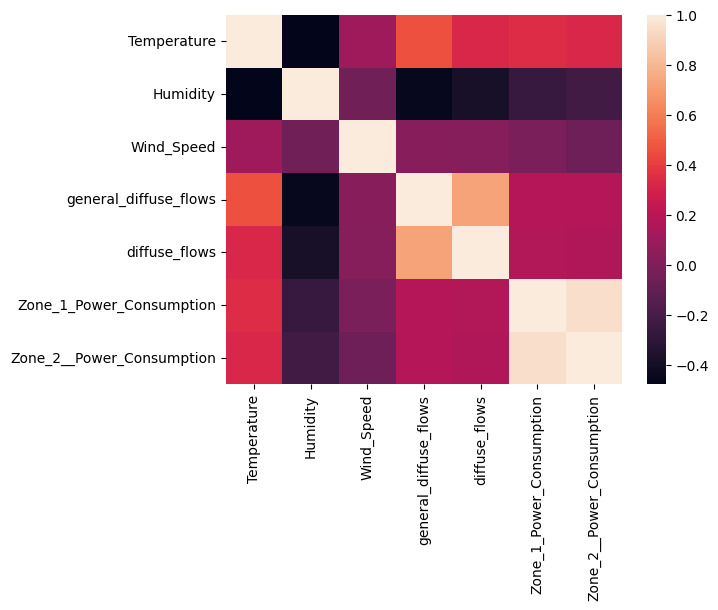

In [14]:
sns.heatmap(X_train.corr())

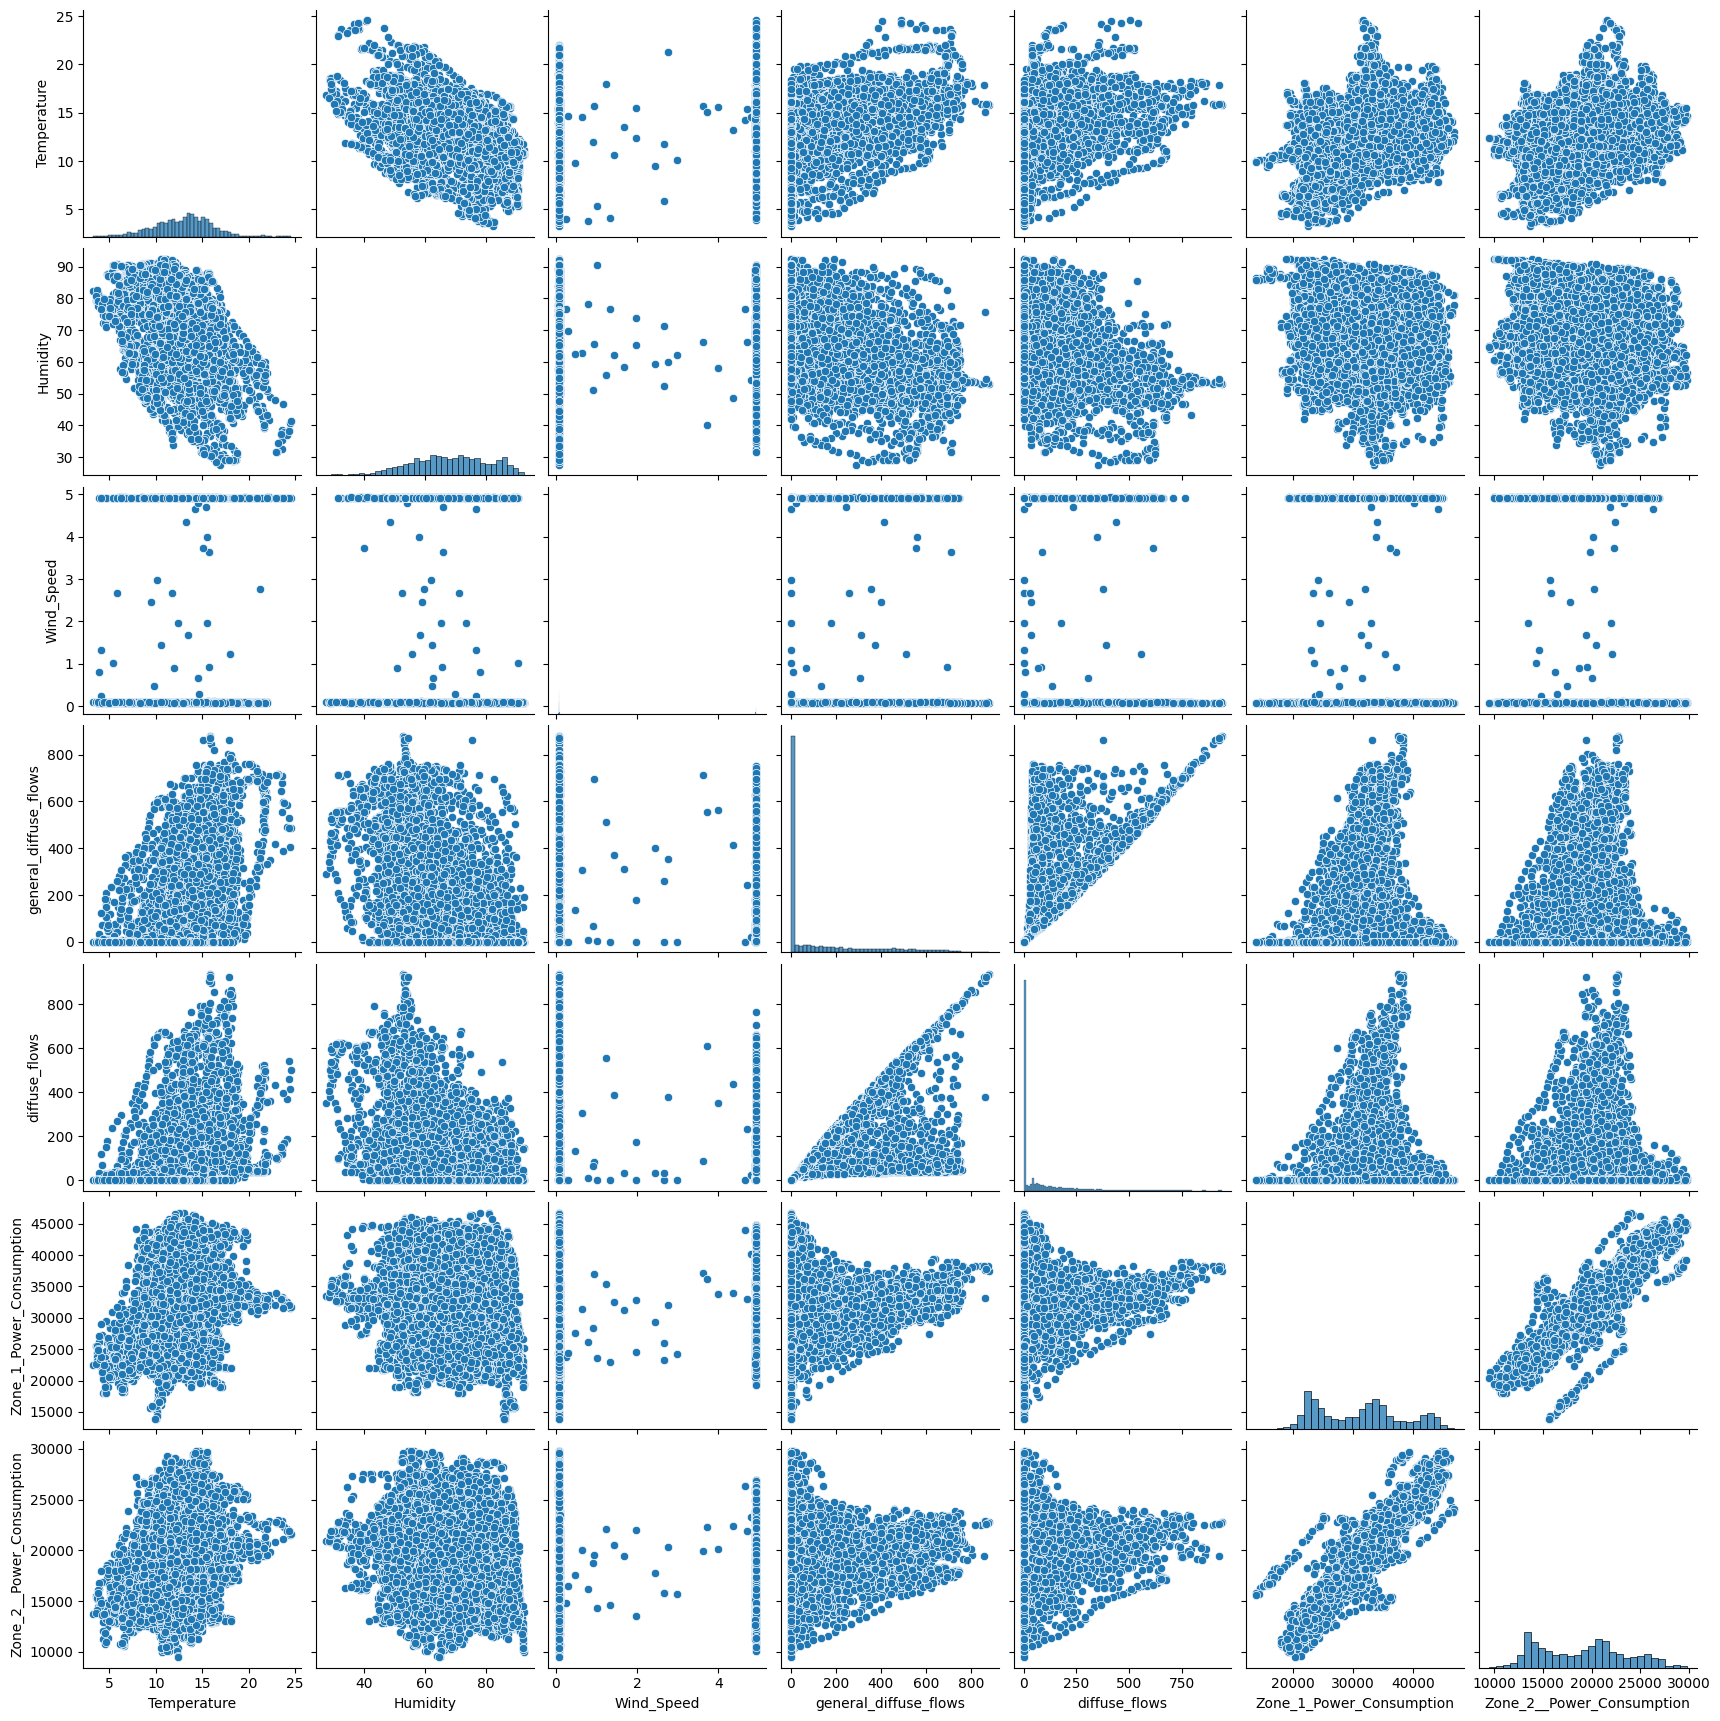

In [15]:
# Basic correlogram
sns.pairplot(X_train)


In [16]:
p = Preprocessor()
vif_coefs = p.vif(X_train)
vif_coefs[vif_coefs['VIF'] >= 10]

,variables,VIF
0,Temperature,20.609703
1,Humidity,12.726990
5,Zone_1_Power_Consumption,222.854267
6,Zone_2__Power_Consumption,215.080527


## Feature selection

#### py

In [18]:

import itertools
from functools import reduce
from typing import Callable, List, Optional, Union

import joblib
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
from IPython.display import clear_output
from tqdm import tqdm


def map_operation(feature_1, feature_2, operations):
    ''' Map operations to features'''
    to_return = set()
    for operation in operations:
        left_side = f'{feature_1} {operation} {feature_2}'
        right_side = f'{feature_2} {operation} {feature_1}'
        if operation in ['+', '*']:
            to_return.update([left_side])
        else:
            to_return.update([left_side, right_side])
    return to_return


def prepare_cols_comb(cols, operations=None):
    """ Get all 2 element combinations from given columns
    
    Args:
        cols: list of columns
        operations: list of operations to use, default ['+', '-', '*', '/']
    Returns:
        list of all combinations of columns with operations
    """
    if operations is None:
        operations = ['+', '-', '*', '/']
    combs = itertools.combinations(cols, 2)
    mapped_cols = map(lambda x: map_operation(x[0], x[1], operations), combs)
    mapped_cols = list(reduce(lambda s1, s2: s1.union(s2), mapped_cols))
    return np.union1d(mapped_cols, cols)

def qcut_iterations(col, data, y_col, score_function, n_bins):
    '''
    Function to calculate the monotonicity of a variable
    '''
    try:
        if isinstance(col, str):
            qcut_vals = data.groupby(pd.qcut(data.eval(col), n_bins, duplicates='drop'))[y_col].agg(score_function)
            ref_x = list(range(1, n_bins+1))
            temp_array = np.array([ref_x, [1]*n_bins])
            slope = sm.OLS(qcut_vals, temp_array.T).fit().params.x1
            mono = scipy.stats.spearmanr(ref_x, qcut_vals)
            n_features = len(col.split(' '))
            n_features = n_features - n_features//2
            return [col, n_features, slope, mono[0],
                                qcut_vals.min(), qcut_vals.max(),
                                qcut_vals[qcut_vals>0].sum(), qcut_vals[qcut_vals<0].sum()
                       ]
        if isinstance(col, list):
            print(col, 'is a list')
    except ValueError as errors:
        print(col, errors)
    except IndexError as errors:
        print(col, errors)
    return []

def qcut_selection(data: pd.DataFrame, y_col: str, cols_to_check: List[str], score_function: Callable,
                   n_bins: int) -> pd.DataFrame:
    """ Returns dataframe with features and their parameters for monotonicity check, such as slope and spearman correlation, due to qcut method.
    
    Args:
        data: dataframe with data
        y_col: name of column with target variable
        cols_to_check: list of columns to check
        score_function: function to calculate score for each bin
        n_bins: number of bins to use
    Returns:
        dataframe with features and their parameters for monotonicity check
    """
    results = []
    results = joblib.Parallel(n_jobs=-1)(joblib.delayed(qcut_iterations)(item, data, y_col, score_function, n_bins)
                                         for item in tqdm(cols_to_check))
    return_df = pd.DataFrame([r for r in results if len(r)], columns = ['feature', 'n_features', 'slope', 'mono', 'min_val', 'max_val', 'sum_pos', 'sum_neg'])
    return_df = return_df.assign(min_max_ratio = lambda x: x.max_val/abs(x.min_val))
    return return_df.sort_values('mono')



def common_member(a_list, b_list):
    """ Returns common elements from two lists
    Args:
        a_list: list
        b: list
    Returns:
        list with common elements
    """
    a_set = set(a_list)
    b_set = set(b_list)

    if a_set & b_set:
        return a_set & b_set
    return []


def qcut_fold_validation(data_set: pd.DataFrame, k_number: int, y_col: str, cols_to_check: List[str], score_function: Callable,
                         n_bins: int, condition: str = 'abs(mono) > 0.8') -> pd.DataFrame:
    """Function is used to select features for monotonicity check. It splits data into k_number 
       of parts and checks monotonicity for each part. Then it check if common feature is monotonic on whole dataset and returns it.
    Args:
        data_set: dataframe with data
        k_number: number of parts to split data
        y_col: name of column with target variable
        cols_to_check: list of columns to check
        score_function: function to calculate score for each bin
        n_bins: number of bins to use
        condition: condition to select features
    Returns:
        dataframe with features and their parameters for monotonicity check
    """
    leng = int(data_set.shape[0] / k_number)
    results = cols_to_check
    for i in range(k_number):
        clear_output()
        print('Round ', i+1, '/', k_number)
        data_frame = data_set[leng * i: leng * (i+1)]
        res = qcut_selection(data_frame,
                             y_col,
                             results,
                             score_function,
                             n_bins).query(condition)
        if res.feature.shape[0] == 0:
            clear_output()
            print('Zero features :(')
            return pd.DataFrame([])
        results = common_member(results, list(res.feature))
    clear_output()
    res = qcut_selection(data_set,
                         y_col,
                         results,
                         score_function, n_bins).query(condition)
    return res


#### dsa

In [19]:
pre_columns = ['Temperature', 'Humidity', 'Wind_Speed', 'general_diffuse_flows',
       'diffuse_flows', 'Zone_1_Power_Consumption',
       'Zone_2__Power_Consumption']

In [27]:
data3 = pd.concat([X_train, y_train], axis=1)

In [42]:
results = qcut_fold_validation(data3, 6, 'class', list(prepare_cols_comb(pre_columns)) + pre_columns, np.mean, 7, 'abs(mono) == 1')

100%|██████████| 3/3 [00:00<?, ?it/s]


In [43]:
results[abs(results.mono)==1].sort_values(['mono']).sort_index()

,feature,n_features,slope,mono,min_val,max_val,sum_pos,sum_neg,min_max_ratio
0,Zone_2__Power_Consumption / Temperature,2,0.114048,1.0,0.038495,0.675416,2.338013,0.0,17.545455
1,Humidity * Zone_2__Power_Consumption,2,0.131423,1.0,0.059493,0.891514,2.337933,0.0,14.985294
2,Temperature / Zone_2__Power_Consumption,2,-0.114048,-1.0,0.038495,0.675416,2.338013,0.0,17.545455


In [47]:
data3.groupby([
    pd.qcut(data3.eval('Humidity * Zone_2__Power_Consumption'), 7),
]).agg(['mean'])[['class']]*100

,class
,mean
"(546989.178, 909297.16]",5.949256
"(909297.16, 1054683.283]",9.790210
"(1054683.283, 1189536.568]",13.835377
"(1189536.568, 1304657.626]",21.716287
"(1304657.626, 1453861.589]",34.908136
"(1453861.589, 1695464.16]",58.442695
"(1695464.16, 2414858.78]",89.151356


In [46]:
data3.groupby([
    pd.qcut(data3.eval('Temperature / Zone_2__Power_Consumption'), 7),
]).agg(['mean'])[['class']]*100

,class
,mean
"(-0.000771, 0.000499]",67.541557
"(0.000499, 0.000571]",57.655293
"(0.000571, 0.000645]",45.406824
"(0.000645, 0.000721]",34.938704
"(0.000721, 0.000806]",16.360455
"(0.000806, 0.000934]",8.048994
"(0.000934, 0.00139]",3.849519


In [48]:
data2['qcut_feat_1'] = data2.eval('Humidity * Zone_2__Power_Consumption')
data2['qcut_feat_2'] = data2.eval('Temperature / Zone_2__Power_Consumption')

### Split again

In [51]:
X = data2[['Temperature', 'Humidity', 'Wind_Speed', 'general_diffuse_flows',
       'diffuse_flows', 'Zone_1_Power_Consumption',
       'Zone_2__Power_Consumption','qcut_feat_1', 'qcut_feat_2']]
y = data2['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.2)

### Chi2 selector

In [52]:
selector = SelectKBest(chi2, k=5)
X_chi2_train= selector.fit_transform(X_train, y_train)
X_chi2_test = selector.transform(X_test)

In [53]:
p.vif(pd.DataFrame(X_chi2_train))

,variables,VIF
0,0,3.155928
1,1,2.758782
2,2,209.849655
3,3,270.592757
4,4,38.098728


In [62]:
# srednio cos robi na górze

### PCA 

In [54]:
pca = PCA(n_components=5)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)
print(pca.explained_variance_)
p.vif(pd.DataFrame(X_pca_train))

[1.22970026e+11 3.58610278e+07 1.16169260e+06 4.20678376e+04
 7.62209181e+03]


,variables,VIF
0,0,1.0
1,1,1.0
2,2,1.0
3,3,1.0
4,4,1.0


## Fit IRLS model

In [55]:
model = logistic_regression()
model.fit(X_pca_train, y_train)
print('beta:', model.beta)
accuracy = model.accuracy(X_pca_test, y_test)
print('pca_accuracy: {:.2f}'.format(accuracy))

(8000, 6)
(6,)
beta: [-1.12238050e+00  7.71443884e-06  3.59605640e-04 -3.22971606e-04
 -5.75482532e-03 -3.79198479e-03]
pca_accuracy: 0.90


## Export data to csv

In [56]:
Power_supply = pd.concat([X, pd.DataFrame(y, columns=["class"])], axis=1)
Power_supply.to_csv('Power_supply.csv', index=False)